In [4]:
# installing required libraries

!pip install pandas
!pip install scikit-learn

In [7]:
# importing required libraries

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [33]:
# clustering demo with generated sample data

# generate sample data for clustering

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# X now contains 300 rows of data spread across 4 clusters that was generated by the make_blobs function.

In [34]:
# apply KMeans clustering

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

C:\Users\Subhra Jyotsna\anaconda3\Anacoda files\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Subhra Jyotsna\anaconda3\Anacoda files\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4)

In [36]:
# print cluster centers

kmeans.cluster_centers_

array([[-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871]])

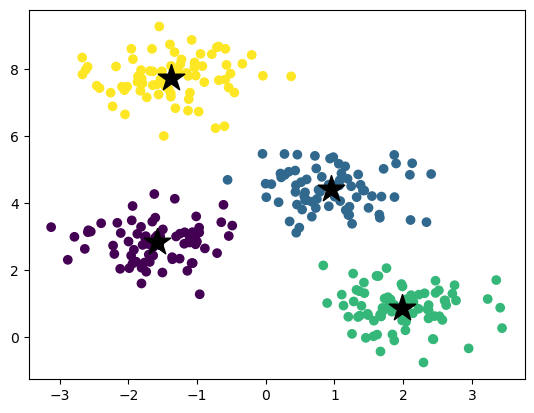

In [42]:
# plot cluster and cluster centers

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=400, color='black')
plt.show()

In [14]:
# loading data in a csv file into a dataframe
# using the read_csv() function in the pandas library, we load the data into a dataframe

WC_data = "D:\Data Science Projects\Cognitive Class\K means\wholesale_customers dataset\Wholesale customers data.csv"

df = pd.read_csv(WC_data)

In [15]:
# show first 5 rows

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
# show random 5 rows

df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
279,2,3,17360,6200,9694,1293,3620,1721
36,1,3,29955,4362,5428,1729,862,4626
55,1,3,5264,3683,5005,1057,2024,1130
157,1,3,17773,1366,2474,3378,811,418
22,1,3,31276,1917,4469,9408,2381,4334


In [18]:
# show number of rows and columns in the dataset

df.shape

(440, 8)

array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

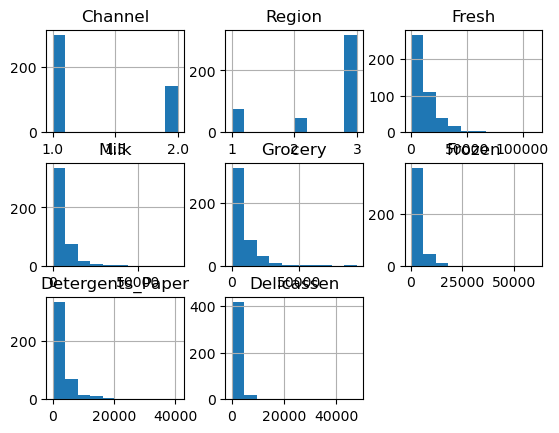

In [27]:
# plot histogram of all the columns in the dataset

df.hist()

In [22]:
# number of clusters to create out of the data (cluster the data into 4 clusters)

number_of_clusters = 4

In [31]:
# create a KMeans clustering model 

cluster = KMeans(n_clusters = number_of_clusters)

In [44]:
# train the model on the dataset

result = cluster.fit_transform(df)

C:\Users\Subhra Jyotsna\anaconda3\Anacoda files\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Subhra Jyotsna\anaconda3\Anacoda files\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [45]:
# print cluster centers

cluster.cluster_centers_

array([[1.96000000e+00, 2.44000000e+00, 8.00004000e+03, 1.85114200e+04,
        2.75739000e+04, 1.99668000e+03, 1.24073600e+04, 2.25202000e+03],
       [1.26060606e+00, 2.55454545e+00, 8.25346970e+03, 3.82460303e+03,
        5.28045455e+03, 2.57266061e+03, 1.77305758e+03, 1.13749697e+03],
       [1.13333333e+00, 2.56666667e+00, 3.59414000e+04, 6.04445000e+03,
        6.28861667e+03, 6.71396667e+03, 1.03966667e+03, 3.04946667e+03]])

In [65]:
# making the prediction and saving them into the column "cluster_number"

df['cluster_number'] = cluster.predict(df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- cluster_number


In [58]:
df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_number
203,1,1,583,685,2216,469,954,18,1
223,2,1,2790,2527,5265,5612,788,1360,1
267,1,1,20893,1222,2576,3975,737,3628,1
348,1,3,3428,2380,2028,1341,1184,665,1
226,2,1,20782,5921,9212,1759,2568,1553,1


In [59]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_number
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2


In [64]:
# printing the cluster numbers and the number of customers in each cluster

df.cluster_number.value_counts()

1    330
2     60
0     50
Name: cluster_number, dtype: int64

(array([[ 36., 100.,  40.,  76.,  44.,   4.,   0.,   0.,   0.,   0.],
        [  0.,   1.,  18.,  55.,  51.,  56.,  44.,   6.,  45.,  24.]]),
 array([-3.12240736, -1.8818734 , -0.64133944,  0.59919452,  1.83972848,
         3.08026243,  4.32079639,  5.56133035,  6.80186431,  8.04239827,
         9.28293222]),
 <a list of 2 BarContainer objects>)

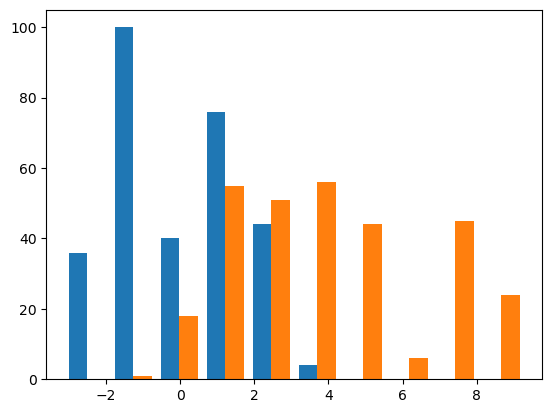

In [67]:
plt.hist(X)